In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Importing important Libraries

In [2]:
traindata=pd.read_csv('bigdatamart_train.csv')
traindata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train = pd.DataFrame(data=traindata)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.shape

(8523, 12)

There are 8523 rows and 12 columns in  the training dataset

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

This code gives us the names of all the columns.

In [6]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

it gives us the data type of each column.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


It gives us the total number of non-null values in each column, datatype of each column and the total memory usage.

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


It gives the mean , mean , std , min, and max of each numerical column.

# Data Cleaning

In [9]:
#Checking for Null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

there are so many null values in columns 'Item_weight' and 'Outlet_size'

<AxesSubplot:>

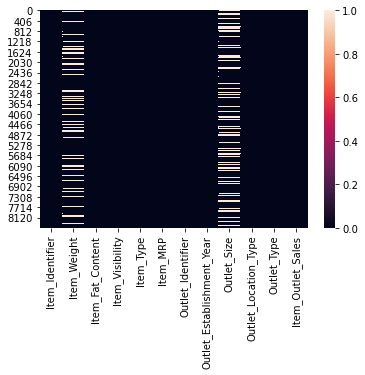

In [10]:
sn.heatmap(train.isnull())

We can visualize the null values in two columns by white lines.

In [11]:
train['Item_Weight'] = train['Item_Weight'].replace(0, np.NaN)
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace = True)

train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have replaced the null values with the mean.

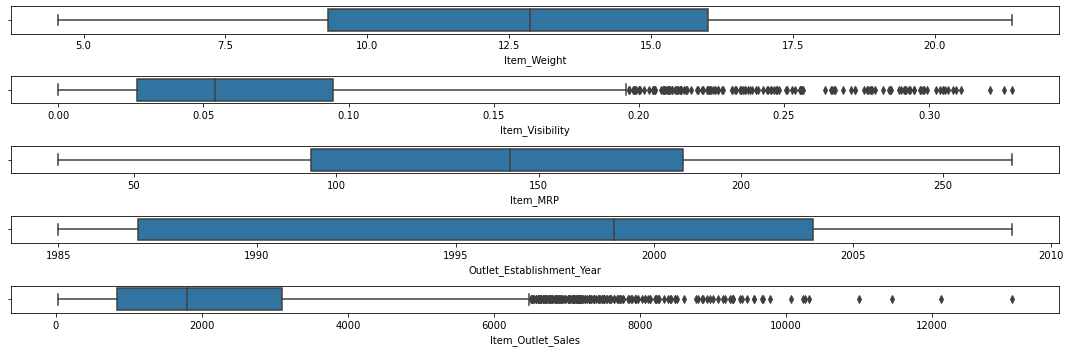

In [12]:
#Outlier Analysis
fig, axs = plt.subplots(5, figsize = (15,5))
plt1 = sn.boxplot(train['Item_Weight'], ax = axs[0])
plt2 = sn.boxplot(train['Item_Visibility'], ax = axs[1])
plt3 = sn.boxplot(train['Item_MRP'], ax = axs[2])
plt4 = sn.boxplot(train['Outlet_Establishment_Year'], ax = axs[3])
plt5 = sn.boxplot(train['Item_Outlet_Sales'], ax = axs[4])
plt.tight_layout()

Columns 'Item Visibility' and 'Item Outlet Sales' have so many outliers which we will have to treat.

In [15]:
dfzscore=np.abs(zscore(train))
dfnew=train[(dfzscore<3).all(axis=1)]
train=dfnew

We have removed the outliers successfully.

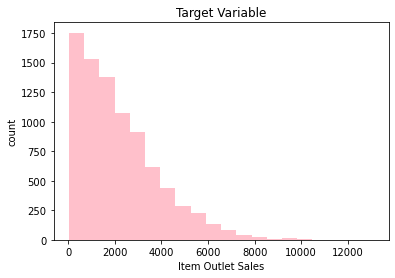

In [16]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

The outlets earning maximum from the advertisements are very few in number.

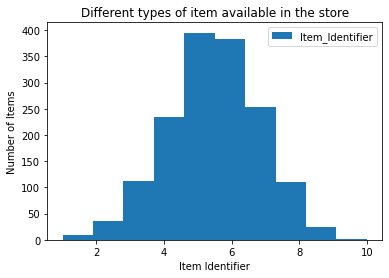

In [17]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

It shows us the total number of items each identifier has.

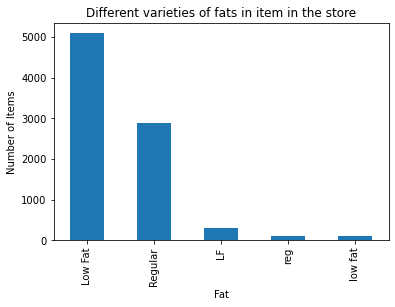

In [18]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

There are 5 varieties of fat content.

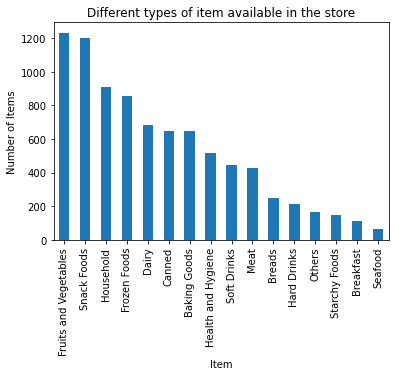

In [19]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

There are 16 types of items available at the store.

In [20]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

checking the different types of Outlet Identifier

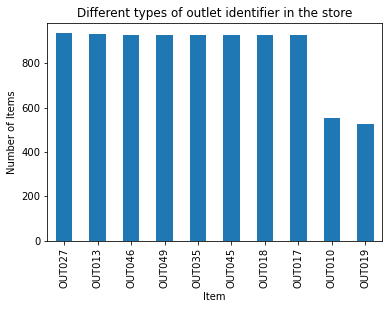

In [21]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

Different types of outlet identifier in the store

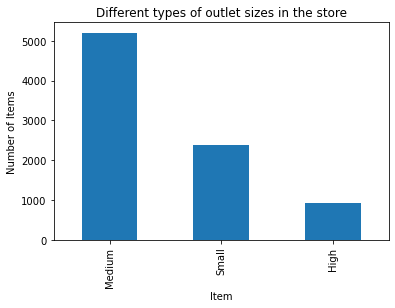

In [22]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

There are 3 types of outlet size: small, medium , High

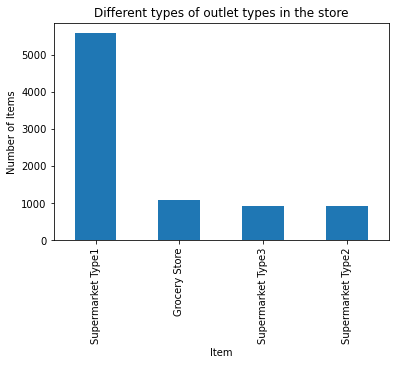

In [23]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


There are 4 types of outlets: Supermarket type-1, Supermarket type-2, Grocery Store, Supermarket Type-3

<AxesSubplot:xlabel='Item_Fat_Content'>

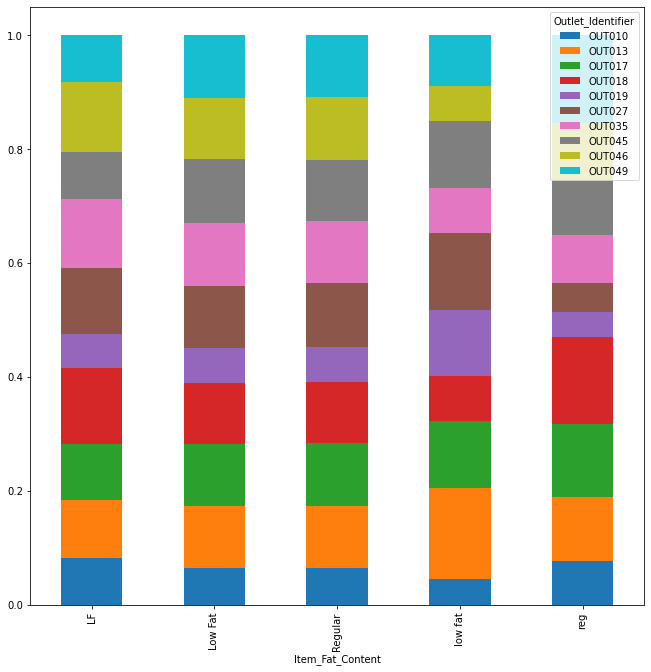

In [24]:
Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

 fat content vs outlet identifier

<AxesSubplot:xlabel='Item_Type'>

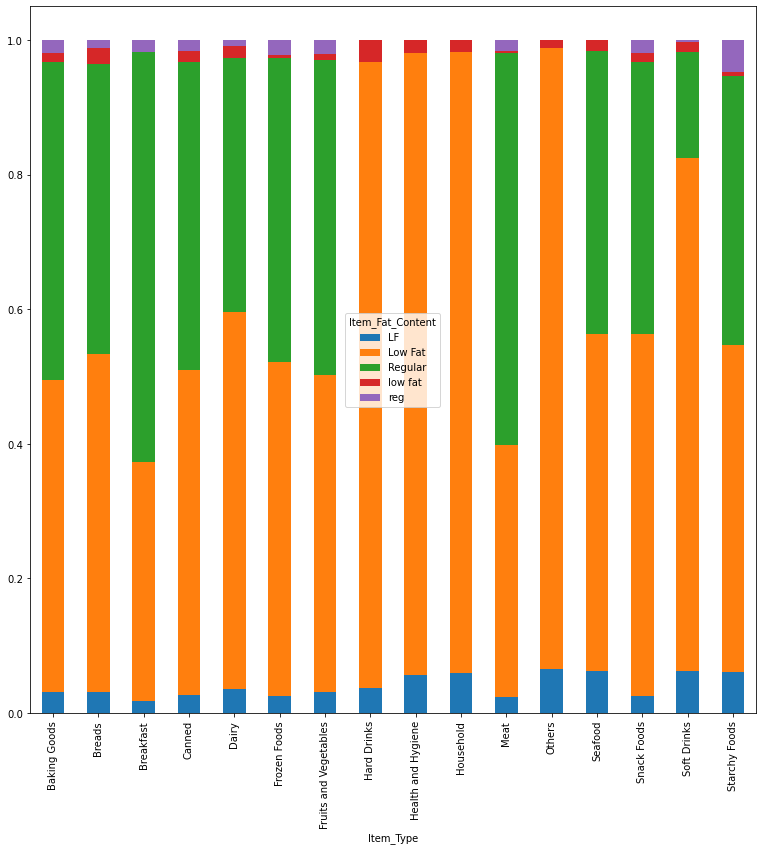

In [25]:
Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

fat content vs item type

In [26]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

combining reg, Regular and Low Fat, low fat and, LF

In [27]:
train['Item_Identifier'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Identifier'] = train['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})
train['Item_Identifier'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

Getting the first two characters of ID to separate them into different categories

In [28]:
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Years'].value_counts()

28    1463
26     932
16     930
9      930
14     930
11     929
4      928
6      926
15     555
Name: Outlet_Years, dtype: int64

determining the operation peroid of a time

In [ ]:
#train = train.drop('Item_Identifier', axis = 1)
#print(train.shape)

train['Outlet_Type'].value_counts()

 removing unnecassary columns from the dataset

In [30]:
from sklearn.preprocessing import LabelEncoder
train.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,664,4,5592,9,4,1,0,1,2540,4
1,0,57,1,880,14,473,3,8,1,2,2,422,0
2,1,376,0,715,10,2901,9,4,1,0,1,1639,4
3,1,393,1,0,6,4227,0,3,1,2,0,670,5
4,2,265,0,0,9,627,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,125,0,3912,13,4955,1,1,0,2,1,2047,7
8519,1,233,1,3278,0,2023,7,5,1,1,1,516,3
8520,2,299,0,2302,8,1263,6,6,2,1,1,1018,2
8521,1,149,1,7175,13,1857,3,8,1,2,2,1466,0


label encoding

In [31]:
train = pd.get_dummies(train)
print(train.shape)

(8523, 47)


one hot encoding

In [32]:
x = train.drop('Item_Outlet_Sales', axis = 1)
y = train.Item_Outlet_Sales
print(x.shape)
print(y.shape)

(8523, 46)
(8523,)


splitting the data into dependent and independent variables

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)

# predicting the  test set results
y_pred = model1.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[4080. 2328. 1608. ... 1056. -336. 4072.]
RMSE : 1105.53143558438
Variance score: 0.57


The r2_score of linear regression is 57%

In [35]:
from sklearn.ensemble import AdaBoostRegressor

model2= AdaBoostRegressor(n_estimators = 100)
model2.fit(x_train, y_train)

# predicting the test set results
y_pred = model2.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 1299.3115827708564
Variance score: 0.41


The r2_score of AdaBoostRegressor is 41%

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

# predicting the test set results
y_pred = model3.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[3903.74010074 2454.52484356 1806.89298964 ... 1120.42572543  306.62679199
 4000.74717148]
RMSE : 1055.3539844793067
Variance score: 0.61


The r2 Score of Gradient Boosting is 61%

In [39]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model4.fit(x_train, y_train)

# predicting the  test set results
y_pred = model4.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model4.score(x_train, y_train))

[3913.87201  2731.617608 1679.500474 ... 1340.135556  386.949644
 3280.716184]
RMSE : 1100.6591048184257
Variance score: 0.58
Result : 0.9353253526150384


r2_score of Random Forest Regressor is 58%

In [41]:
from sklearn.tree import DecisionTreeRegressor

model5 = DecisionTreeRegressor()
model5.fit(x_train, y_train)

# predicting the test set results
y_pred = model5.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[2848.9582 1095.241  2175.8344 ... 1619.2256  595.2252 3036.048 ]
 RMSE :  1525.6373542212818
Variance score: 0.19


The r2_score of DecisionTreeRegressor is 19%

In [43]:
cvs1 = cross_val_score(model1,x,y,cv=4)
cvmean1=cvs1.mean()
print('The CV score of model 1 is :',cvmean1)

cvs2 = cross_val_score(model2,x,y,cv=4)
cvmean2=cvs2.mean()
print('The CV score of model 2 is :',cvmean2)

cvs3 = cross_val_score(model3,x,y,cv=4)
cvmean3=cvs3.mean()
print('The CV score of model 3 is :',cvmean3)

cvs4 = cross_val_score(model4,x,y,cv=4)
cvmean4=cvs4.mean()
print('The CV score of model 4 is :',cvmean4)

cvs5 = cross_val_score(model5,x,y,cv=4)
cvmean5=cvs5.mean()
print('The CV score of model 5 is :',cvmean5)

The CV score of model 1 is : 0.5569191670489233
The CV score of model 2 is : 0.44002652704910183
The CV score of model 3 is : 0.591076406037988
The CV score of model 4 is : 0.548690934250692
The CV score of model 5 is : 0.16550431100458954


In [44]:
test = pd.read_csv('bigdatamart_test.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [45]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [46]:
test['Item_Weight'] = test['Item_Weight'].replace(0, np.NaN)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace = True)

test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [47]:
# combining reg, Regular and Low Fat, low fat and, LF


test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [48]:
# Getting the first two characters of ID to separate them into different categories

test['Item_Identifier'] = test['Item_Identifier'].apply(lambda x: x[0:2])

test['Item_Identifier'] = test['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

test['Item_Identifier'].value_counts()

Food              4076
Non_Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64